In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")  

# Problem Statement

In [4]:
df=pd.read_csv('D:/program session/project/flight/train-2.csv')
df.head(2)

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,F1,Airline B,NaN,Greenshire,8286.0,8:23,20:19,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,F2,Airline C,Leonardland,New Stephen,2942.0,20:28,1:45,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,NaN,1.08,423.13


### Basic Analysis of Dataset from Problem Statement and Features

#### 1.we should merge the data set 
#### 2.it is a supervised learning problem - We are predicting target variable
#### 3.From target varible we can clearly understand it is a Regression problem
#### 4.From target varible is Flight_price 

# Analysis of Dataset

In [5]:
#finding the column names
df.columns

Index(['Flight_ID', 'Airline', 'Departure_City', 'Arrival_City', 'Distance',
       'Departure_Time', 'Arrival_Time', 'Duration', 'Aircraft_Type',
       'Number_of_Stops', 'Day_of_Week', 'Month_of_Travel', 'Holiday_Season',
       'Demand', 'Weather_Conditions', 'Passenger_Count', 'Promotion_Type',
       'Fuel_Price', 'Flight_Price'],
      dtype='object')

In [6]:
#Basic statistical analysis of dataset
df.describe()

,Distance,Duration,Number_of_Stops,Passenger_Count,Fuel_Price,Flight_Price
count,44909.000000,45000.000000,45000.000000,45000.000000,44910.000000,45000.000000
mean,5482.238727,7.852555,0.665667,174.928822,0.850192,574.606270
std,2594.847860,3.292880,0.750578,72.372980,0.201736,160.239344
min,1000.000000,1.280000,0.000000,50.000000,0.500000,173.350000
25%,3230.000000,5.040000,0.000000,112.000000,0.680000,455.297500
50%,5476.000000,7.840000,1.000000,175.000000,0.850000,565.750000
75%,7725.000000,10.650000,1.000000,238.000000,1.020000,679.692500
max,10000.000000,14.450000,3.000000,300.000000,1.200000,1261.640000


In [7]:
# checking for the data is balanced or not
df['Flight_Price'].value_counts()

Flight_Price
471.25     6
395.54     6
473.75     6
536.57     6
540.21     6
          ..
641.61     1
426.41     1
1012.71    1
322.05     1
532.92     1
Name: count, Length: 31336, dtype: int64

# Data Cleaning

# Missing Value

In [8]:
df.isnull().sum()

Flight_ID                 0
Airline                3573
Departure_City          340
Arrival_City            186
Distance                 91
Departure_Time            0
Arrival_Time              0
Duration                  0
Aircraft_Type            43
Number_of_Stops           0
Day_of_Week             225
Month_of_Travel         267
Holiday_Season         9020
Demand                  317
Weather_Conditions      302
Passenger_Count           0
Promotion_Type        15215
Fuel_Price               90
Flight_Price              0
dtype: int64

In [9]:
#percentage of Null value
df.isnull().sum() * 100 / len(df)

Flight_ID              0.000000
Airline                7.940000
Departure_City         0.755556
Arrival_City           0.413333
Distance               0.202222
Departure_Time         0.000000
Arrival_Time           0.000000
Duration               0.000000
Aircraft_Type          0.095556
Number_of_Stops        0.000000
Day_of_Week            0.500000
Month_of_Travel        0.593333
Holiday_Season        20.044444
Demand                 0.704444
Weather_Conditions     0.671111
Passenger_Count        0.000000
Promotion_Type        33.811111
Fuel_Price             0.200000
Flight_Price           0.000000
dtype: float64

In [10]:
df.dtypes

Flight_ID              object
Airline                object
Departure_City         object
Arrival_City           object
Distance              float64
Departure_Time         object
Arrival_Time           object
Duration              float64
Aircraft_Type          object
Number_of_Stops         int64
Day_of_Week            object
Month_of_Travel        object
Holiday_Season         object
Demand                 object
Weather_Conditions     object
Passenger_Count         int64
Promotion_Type         object
Fuel_Price            float64
Flight_Price          float64
dtype: object

In [11]:
# Assuming you have a DataFrame named 'df'
# Fill missing values with the mode of each respective column
df = df.fillna({
    'Airline': df['Airline'].mode()[0],
    'Departure_City': df['Departure_City'].mode()[0],
    'Arrival_City': df['Arrival_City'].mode()[0],
    'Aircraft_Type': df['Aircraft_Type'].mode()[0],
    'Day_of_Week': df['Day_of_Week'].mode()[0],
    'Month_of_Travel': df['Month_of_Travel'].mode()[0],
    'Holiday_Season': df['Holiday_Season'].mode()[0],
    'Demand': df['Demand'].mode()[0],
    'Weather_Conditions': df['Weather_Conditions'].mode()[0],
    'Promotion_Type': df['Promotion_Type'].mode()[0]
})


In [12]:
#condinues data fill with Mean or median
# filling the missing values using statistical techniques
df = df.fillna({'Distance': df['Distance'].mean(),
               'Fuel_Price': df['Fuel_Price'].mean()})

In [13]:
df.isnull().sum()

Flight_ID             0
Airline               0
Departure_City        0
Arrival_City          0
Distance              0
Departure_Time        0
Arrival_Time          0
Duration              0
Aircraft_Type         0
Number_of_Stops       0
Day_of_Week           0
Month_of_Travel       0
Holiday_Season        0
Demand                0
Weather_Conditions    0
Passenger_Count       0
Promotion_Type        0
Fuel_Price            0
Flight_Price          0
dtype: int64

# Wrong Formate

In [14]:
df.dtypes

Flight_ID              object
Airline                object
Departure_City         object
Arrival_City           object
Distance              float64
Departure_Time         object
Arrival_Time           object
Duration              float64
Aircraft_Type          object
Number_of_Stops         int64
Day_of_Week            object
Month_of_Travel        object
Holiday_Season         object
Demand                 object
Weather_Conditions     object
Passenger_Count         int64
Promotion_Type         object
Fuel_Price            float64
Flight_Price          float64
dtype: object

In [15]:
df['Departure_Time'] = pd.to_datetime(df['Departure_Time'])

df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

In [16]:
df.head(2)

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,F1,Airline B,Port Michael,Greenshire,8286.0,2023-11-13 08:23:00,2023-11-13 20:19:00,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,F2,Airline C,Leonardland,New Stephen,2942.0,2023-11-13 20:28:00,2023-11-13 01:45:00,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,Special Offer,1.08,423.13


# Duplicate

In [17]:
df.duplicated().sum()

0

# Text Error

In [18]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['Flight_ID',
 'Airline',
 'Departure_City',
 'Arrival_City',
 'Aircraft_Type',
 'Day_of_Week',
 'Month_of_Travel',
 'Holiday_Season',
 'Demand',
 'Weather_Conditions',
 'Promotion_Type']

In [19]:
df['Flight_ID'].value_counts()

Flight_ID
F1        1
F30004    1
F29996    1
F29997    1
F29998    1
         ..
F15002    1
F15003    1
F15004    1
F15005    1
F45000    1
Name: count, Length: 45000, dtype: int64

In [20]:
#May be this is useless better its remove
df.drop(columns='Flight_ID', inplace=True)

In [21]:
df['Airline'].value_counts()

Airline
Airline A    17436
Airline C    13809
Airline B    13755
Name: count, dtype: int64

In [22]:
departure_city_counts = df['Departure_City'].value_counts()
print(departure_city_counts)

Departure_City
Port Michael         389
West Michael          47
North Michael         42
South Michael         40
North David           39
                    ... 
New Jordanchester      1
North Morgan           1
North Mindy            1
Mcmillanberg           1
East Patriciafurt      1
Name: count, Length: 23187, dtype: int64


In [23]:
df["Arrival_City"].value_counts('')

Arrival_City
North Michael       235
Port Michael         47
Lake Michael         42
New Michael          35
Michaelmouth         35
                   ... 
Summerland            1
North Lindafurt       1
West Waynetown        1
North Keithmouth      1
Gabrielville          1
Name: count, Length: 23479, dtype: int64

In [24]:
df["Aircraft_Type"].value_counts()

Aircraft_Type
Airbus A320    9154
Boeing 777     9059
Boeing 787     8952
Airbus A380    8943
Boeing 737     8892
Name: count, dtype: int64

In [25]:
df["Day_of_Week"].value_counts()

Day_of_Week
Sunday       6697
Saturday     6418
Friday       6414
Monday       6407
Wednesday    6406
Tuesday      6336
Thursday     6322
Name: count, dtype: int64

In [26]:
df["Month_of_Travel"].value_counts()

Month_of_Travel
January      4110
October      3812
April        3776
July         3755
November     3749
September    3731
March        3727
August       3712
December     3700
June         3672
May          3658
February     3598
Name: count, dtype: int64

In [27]:
df["Holiday_Season"].value_counts()

Holiday_Season
Spring    18056
Fall       9010
Summer     8970
Winter     8964
Name: count, dtype: int64

In [28]:
df["Demand"].value_counts()

Demand
Low       29263
Medium     8954
High       6783
Name: count, dtype: int64

In [29]:
df["Weather_Conditions"].value_counts()

Weather_Conditions
Cloudy    11711
Snow      11148
Rain      11093
Clear     11048
Name: count, dtype: int64

In [30]:
df["Promotion_Type"].value_counts()

Promotion_Type
Special Offer    30111
Discount         14889
Name: count, dtype: int64

# Outlier

In [31]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['Distance', 'Duration', 'Fuel_Price', 'Flight_Price']

In [32]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['Number_of_Stops', 'Passenger_Count']

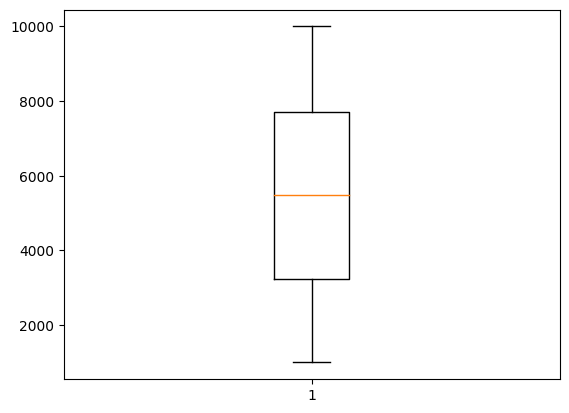

In [33]:
# Creating plot
plt.boxplot(df['Distance'] )

# show plot
plt.show()

In [34]:
Q1 = df['Distance'].quantile(0.25)
Q3 = df['Distance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [35]:
lower_bound , upper_bound

(-3497.5, 14450.5)

In [36]:
df.Distance = df.Distance.clip(lower_bound , upper_bound)

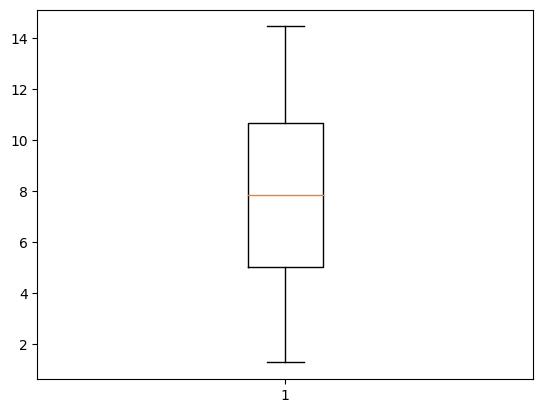

In [37]:
#Duretion checking
plt.boxplot(df['Duration'] )

# show plot
plt.show()

In [38]:
Q1 = df['Duration'].quantile(0.25)
Q3 = df['Duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-3.375000000000001, 19.065)

In [39]:
df.Duration = df.Duration.clip(lower_bound , upper_bound)


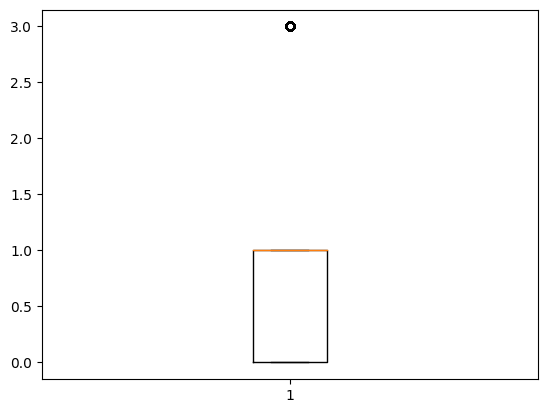

In [40]:
#Number_of_Stops
plt.boxplot(df['Number_of_Stops'] )

# show plot
plt.show()

In [41]:
Q1 = df['Number_of_Stops'].quantile(0.25)
Q3 = df['Number_of_Stops'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-1.5, 2.5)

In [42]:
df.Number_of_Stops = df.Number_of_Stops.clip(lower_bound , upper_bound)

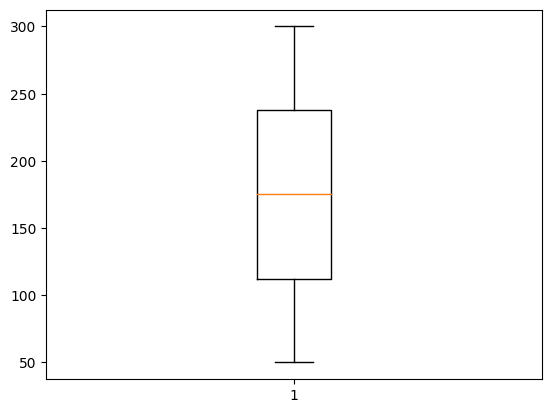

In [43]:
#Passenger_Count
plt.boxplot(df['Passenger_Count'] )

# show plot
plt.show()

In [44]:
Q1 = df['Passenger_Count'].quantile(0.25)
Q3 = df['Passenger_Count'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(-77.0, 427.0)

In [45]:
df.Passenger_Count = df.Passenger_Count.clip(lower_bound , upper_bound)

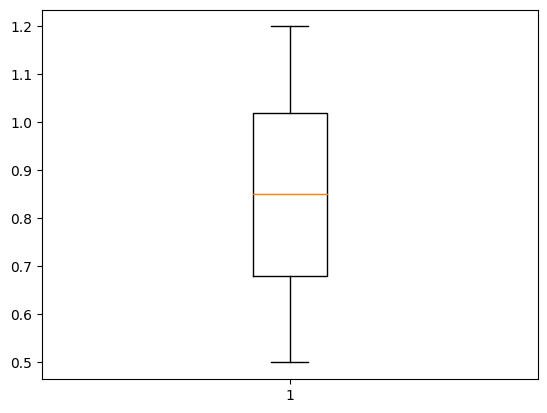

In [46]:
#Fuel_Price
plt.boxplot(df['Fuel_Price'] )

# show plot
plt.show()

In [47]:
Q1 = df['Fuel_Price'].quantile(0.25)
Q3 = df['Fuel_Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(0.17000000000000004, 1.53)

In [48]:
df.Fuel_Price = df.Fuel_Price.clip(lower_bound , upper_bound)

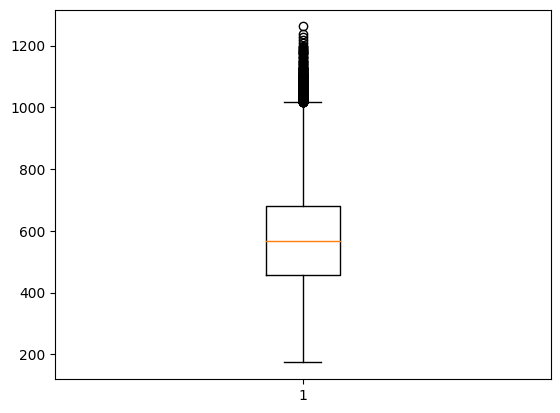

In [49]:
#Flight_Price
plt.boxplot(df['Flight_Price'] )

# show plot
plt.show()

In [50]:
Q1 = df['Flight_Price'].quantile(0.25)
Q3 = df['Flight_Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(118.70499999999987, 1016.2850000000003)

In [51]:
df.Flight_Price = df.Flight_Price.clip(lower_bound , upper_bound)

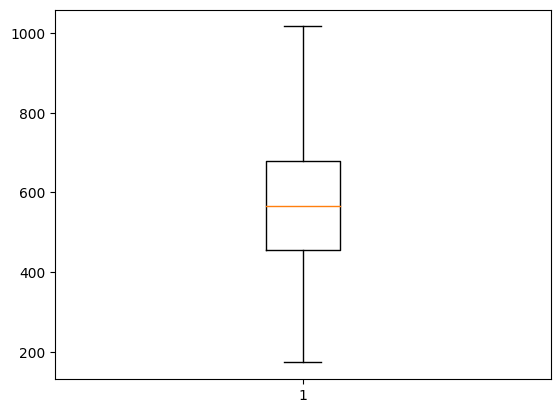

In [52]:
#after outlier remove
plt.boxplot(df['Flight_Price'] )

# show plot
plt.show()

# Eda (Exploratary Data Analysis)

### plotting BarPlot for all the categorical columns

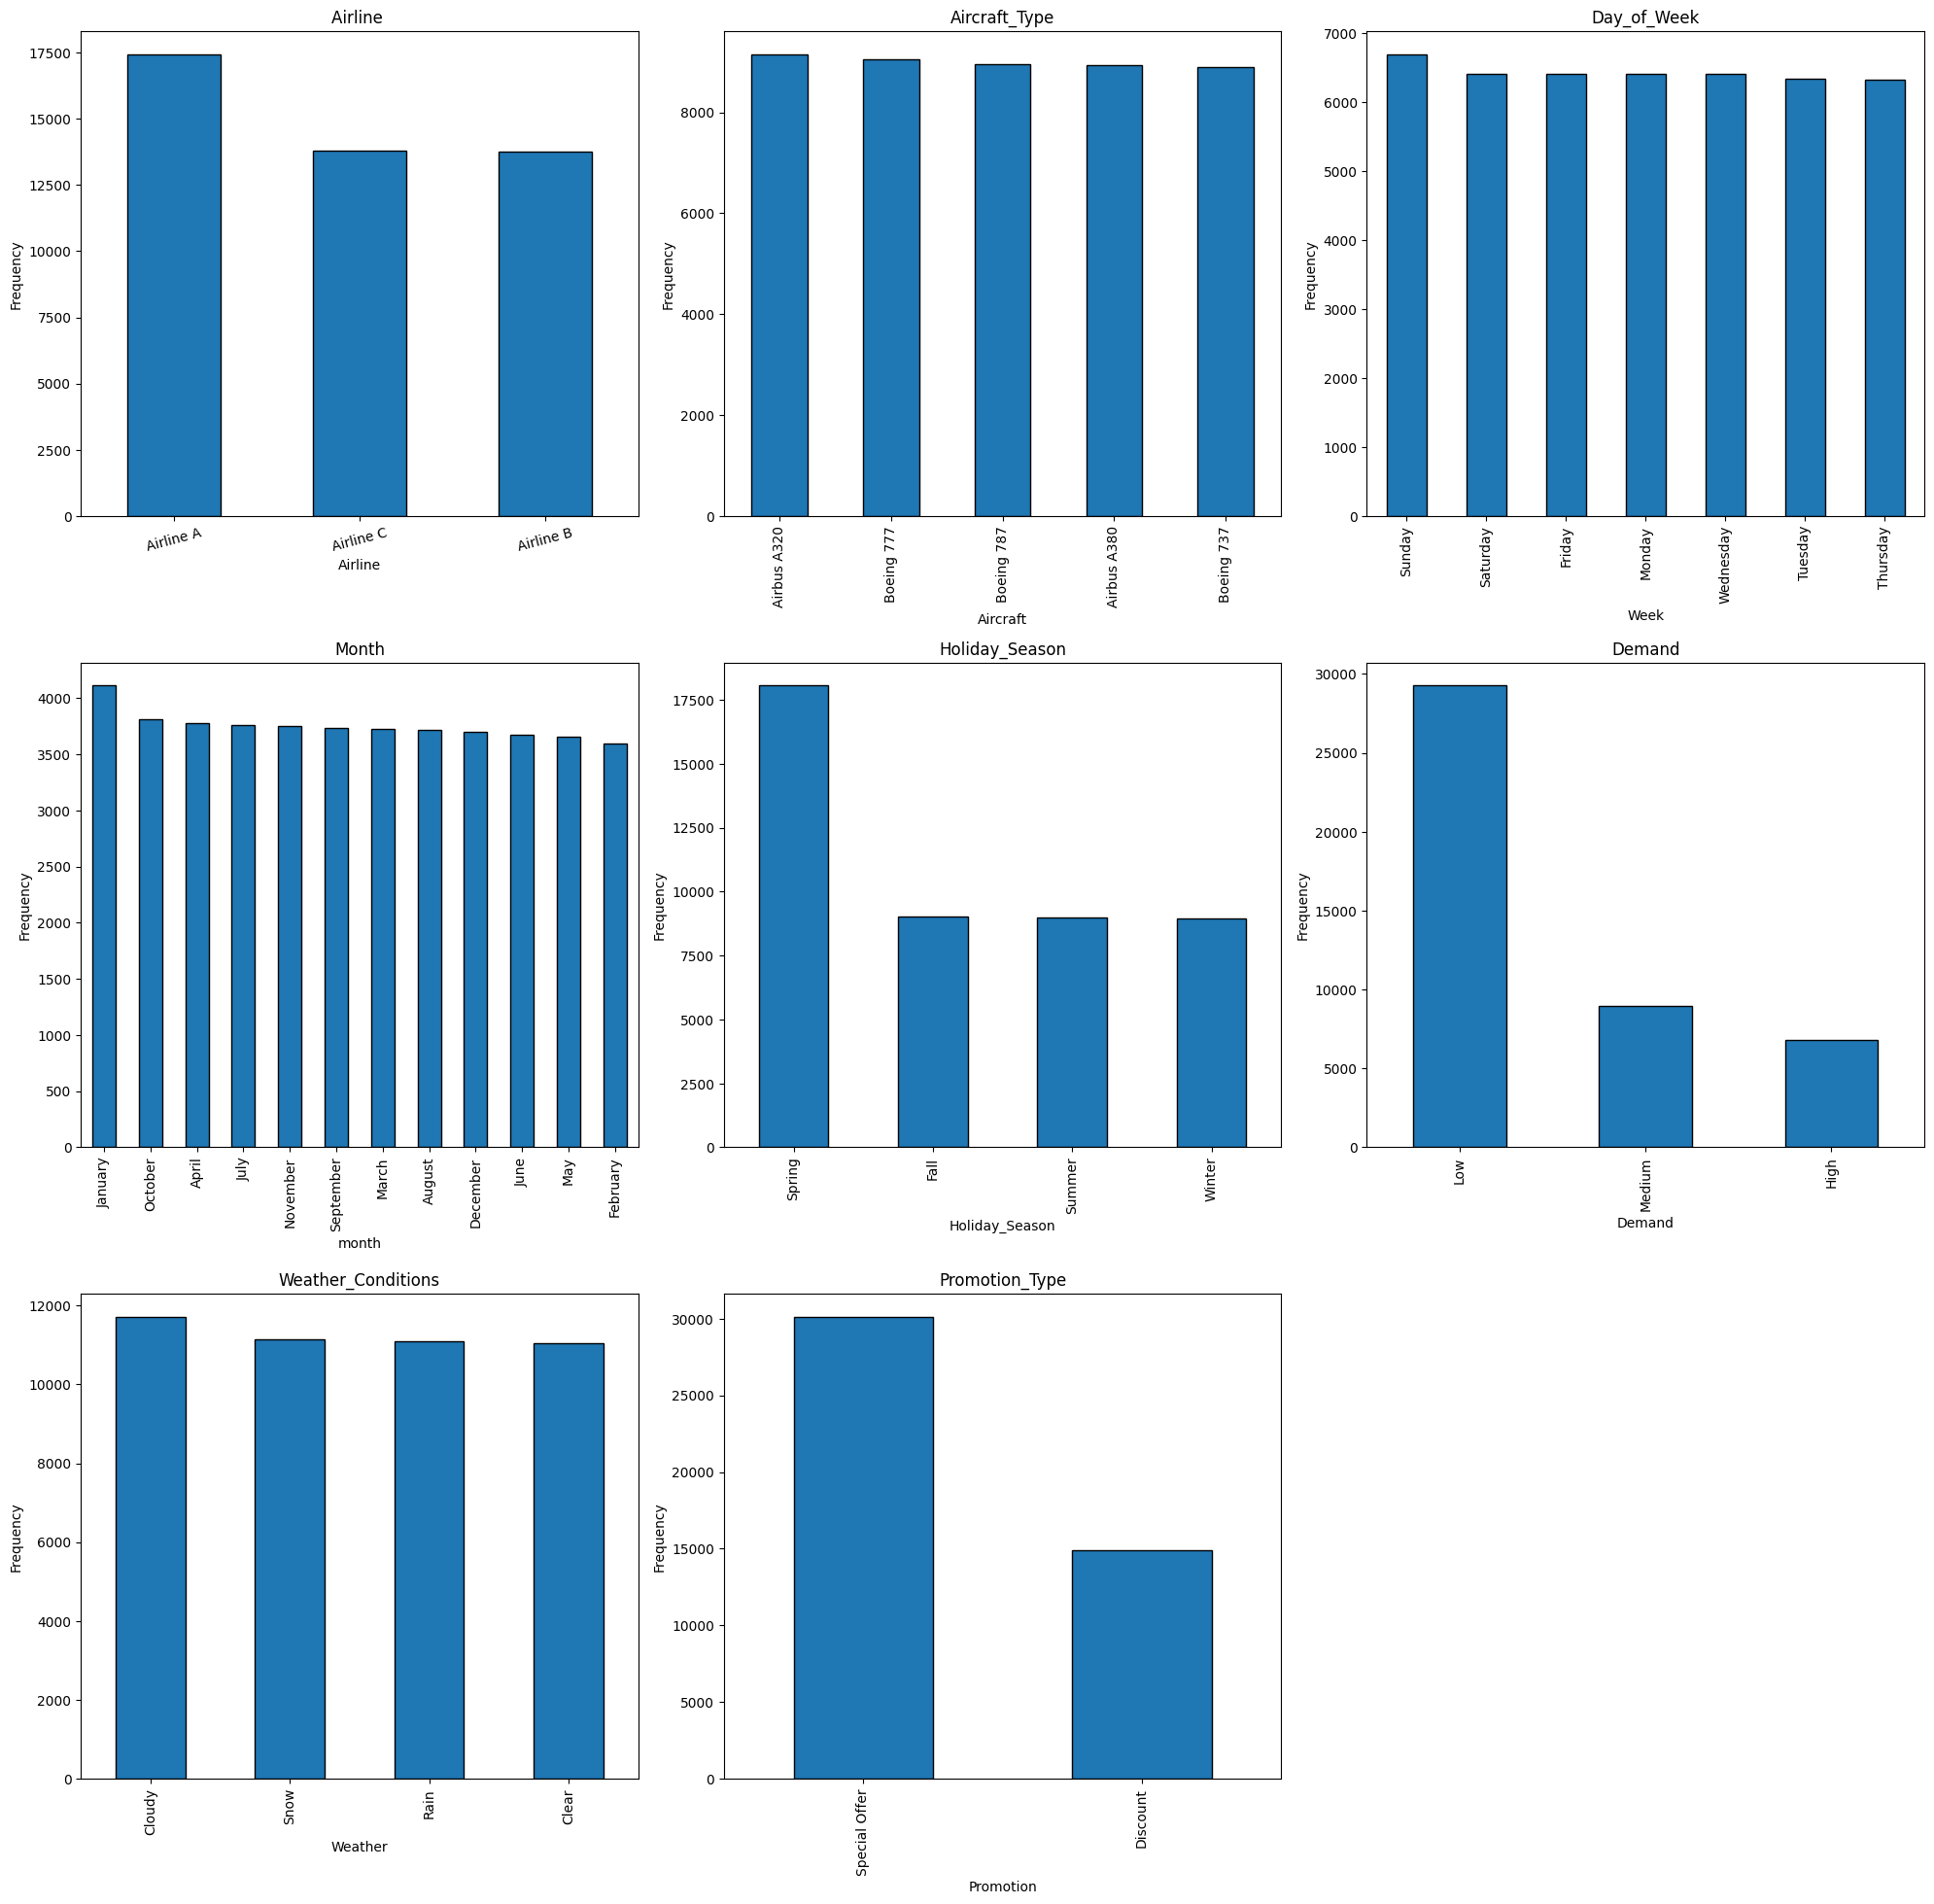

In [53]:
# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 25))



plt.subplot(431)
df['Airline'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('Airline ')
plt.xlabel('Airline')
plt.ylabel('Frequency')
plt.xticks(rotation=15)

plt.subplot(432)
df['Aircraft_Type'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('Aircraft_Type')
plt.xlabel('Aircraft')
plt.ylabel('Frequency')

plt.subplot(433)
df['Day_of_Week'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('Day_of_Week')
plt.xlabel('Week')
plt.ylabel('Frequency')

plt.subplot(434)
df['Month_of_Travel'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('Month')
plt.xlabel('month')
plt.ylabel('Frequency')

plt.subplot(435)
df['Holiday_Season'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('Holiday_Season')
plt.xlabel('Holiday_Season')
plt.ylabel('Frequency')

plt.subplot(436)
df['Demand'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('Demand')
plt.xlabel('Demand')
plt.ylabel('Frequency')

plt.subplot(437)
df['Weather_Conditions'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('Weather_Conditions')
plt.xlabel('Weather')
plt.ylabel('Frequency')

plt.subplot(438)
df['Promotion_Type'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('Promotion_Type')
plt.xlabel('Promotion')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Feature Vs Target (Categorical Data )

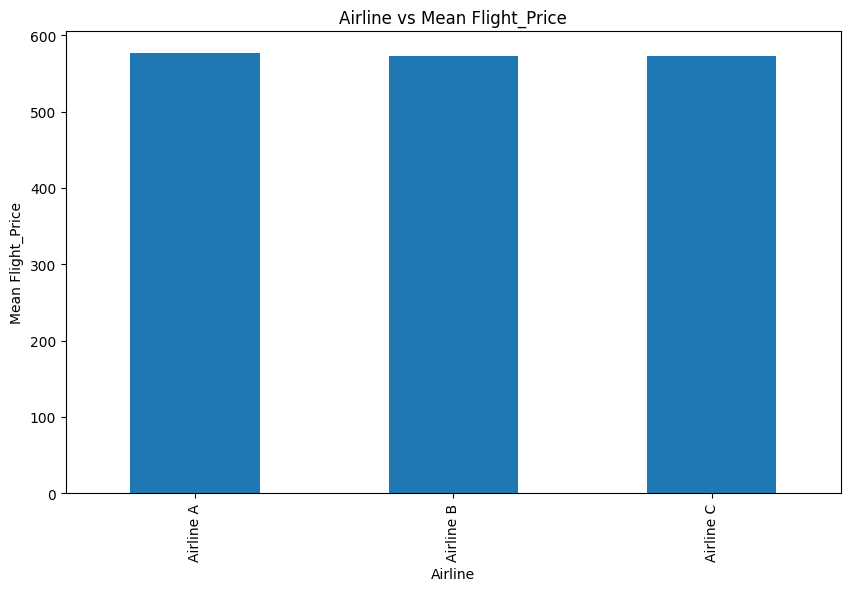

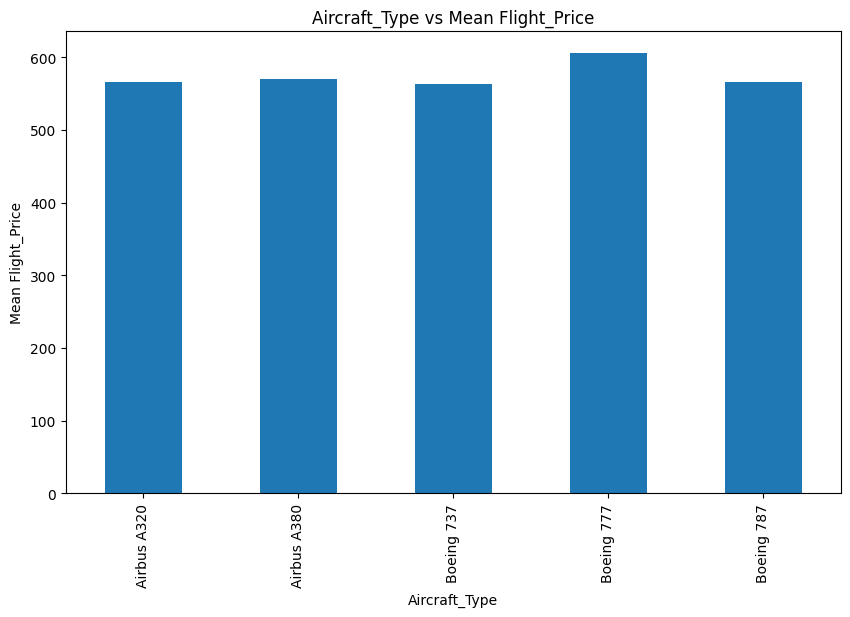

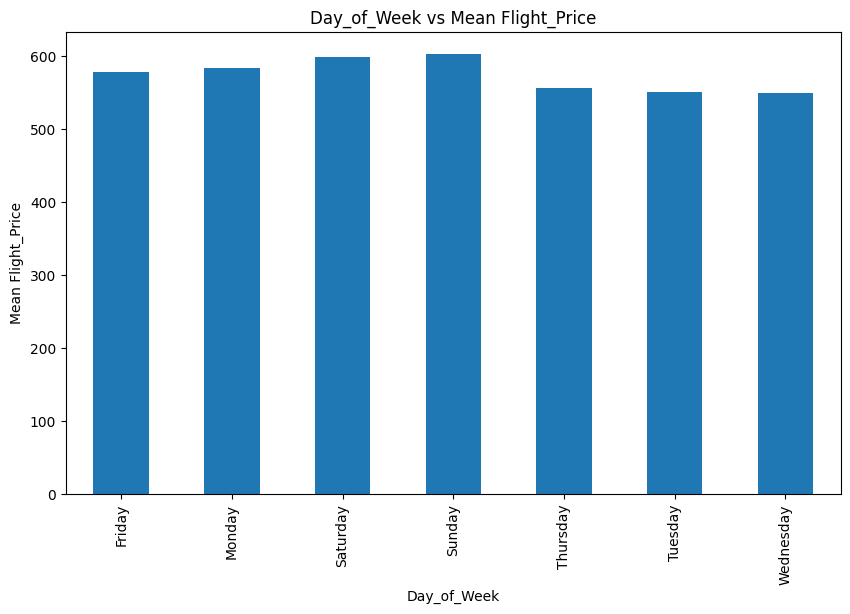

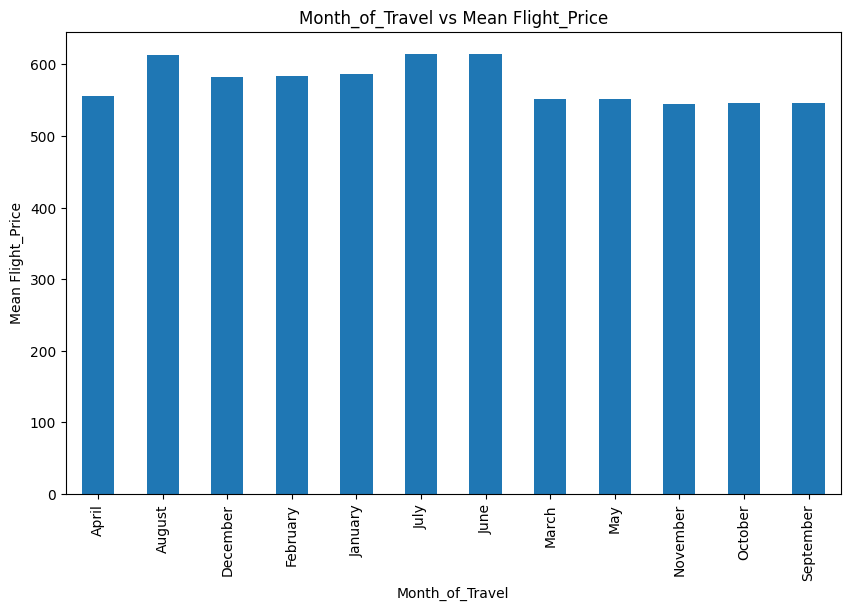

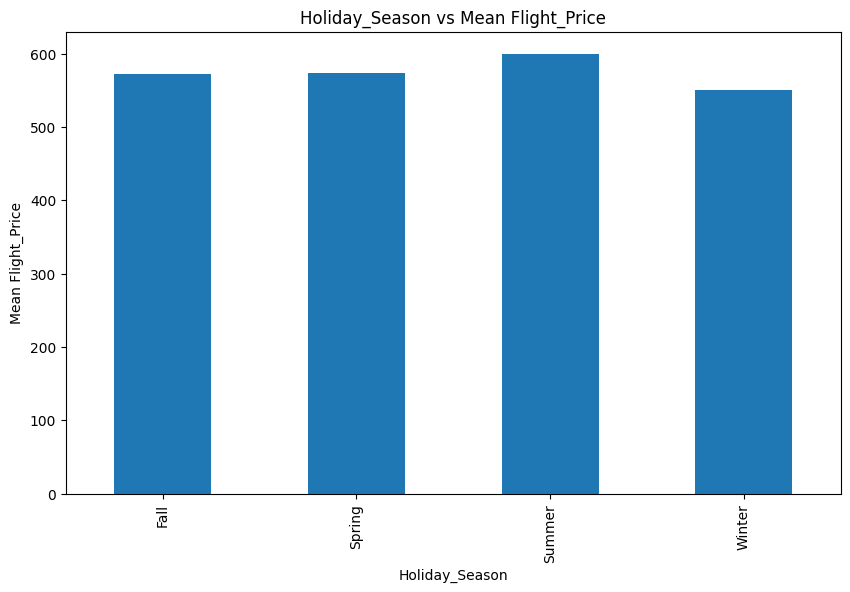

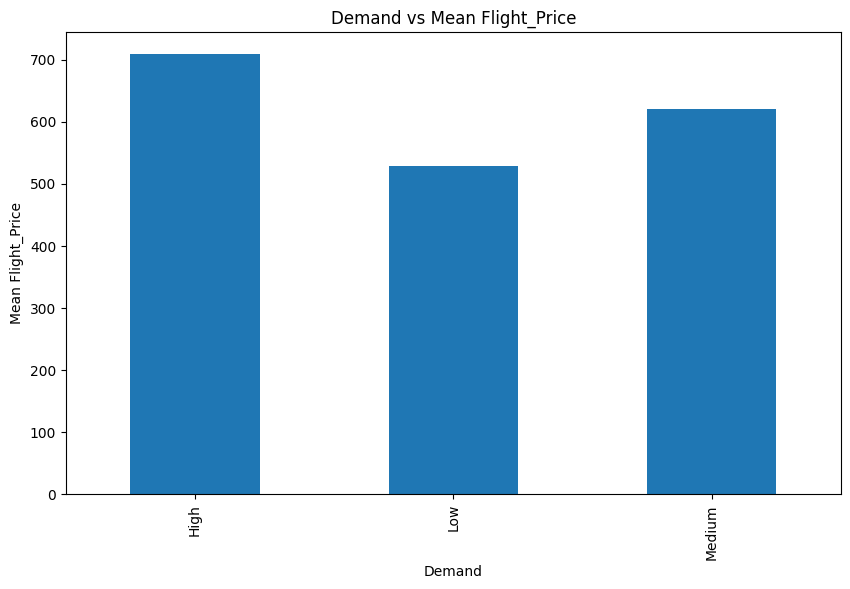

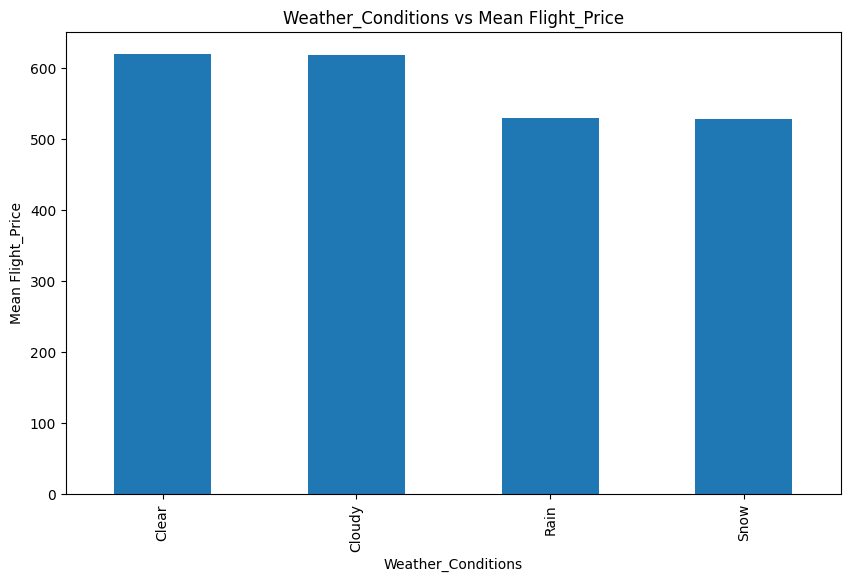

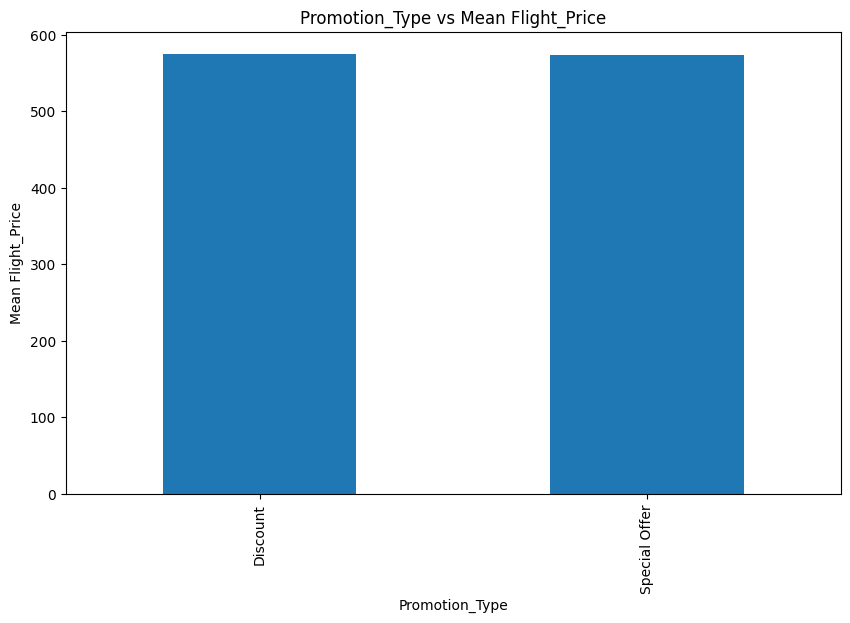

In [54]:
# List of features to plot
features = [
    'Airline',
    'Aircraft_Type',
    'Day_of_Week',
    'Month_of_Travel',
    'Holiday_Season',
    'Demand',
    'Weather_Conditions',
    'Promotion_Type'
]
for feature in features:
    plt.figure(figsize=(10, 6))
    df.groupby(feature)['Flight_Price'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Mean Flight_Price')
    plt.title(f'{feature} vs Mean Flight_Price')
    plt.show()

### Feature Vs Target (Condinues Data )

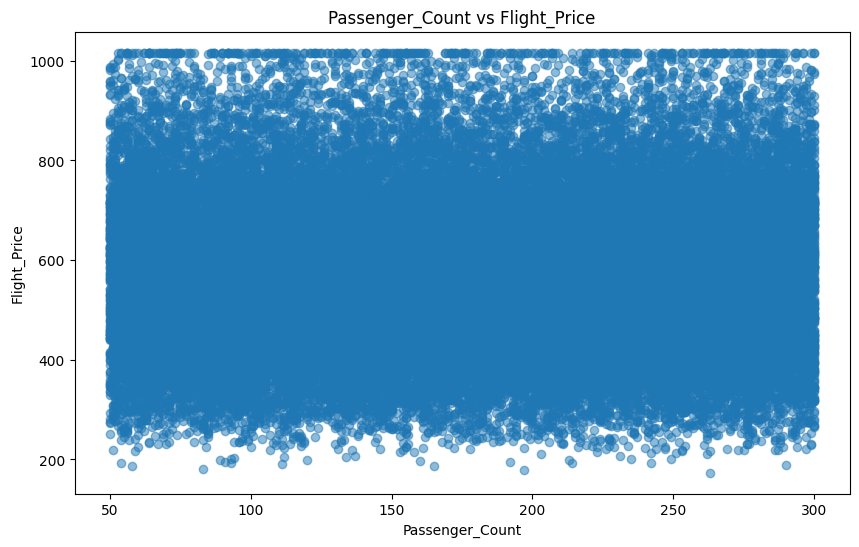

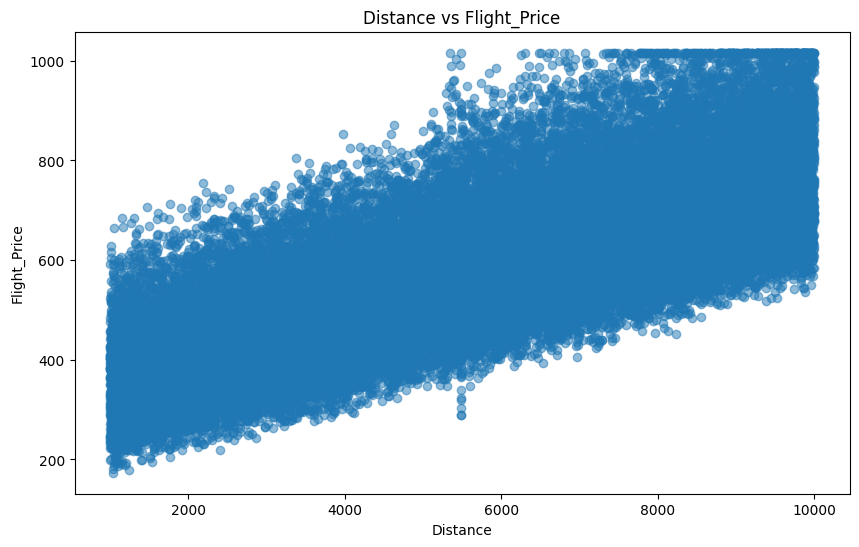

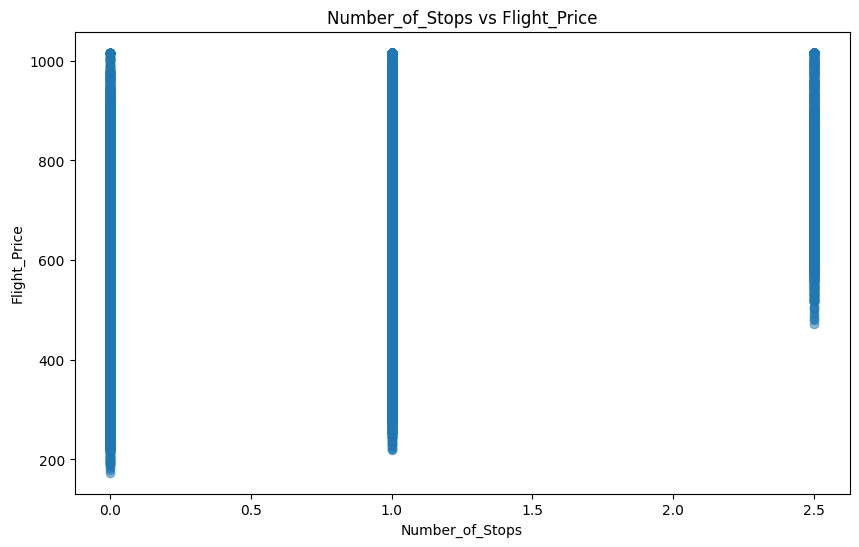

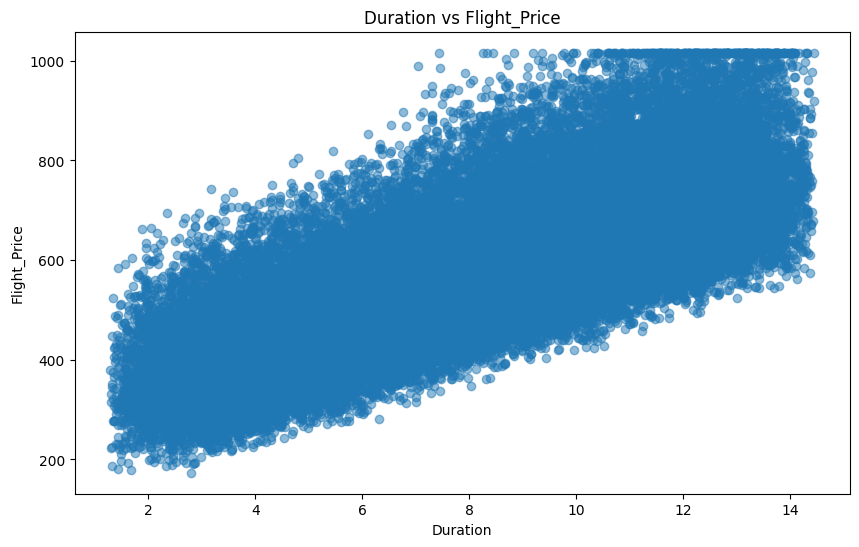

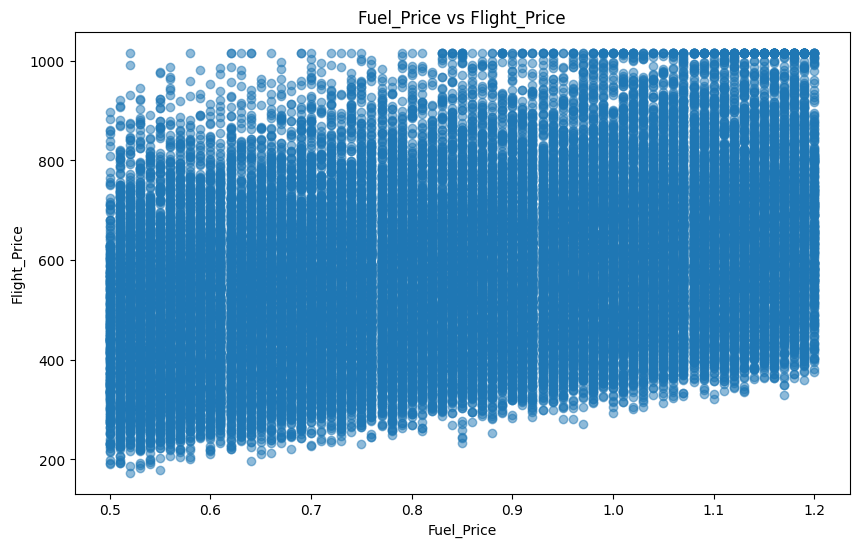

In [55]:
features = [ 'Passenger_Count','Distance','Number_of_Stops', 'Duration', 'Fuel_Price']
target = 'Flight_Price'
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()

In [56]:
#delete Use less columns
del df['Departure_Time']
del df['Arrival_Time']

# Encoding Categorical Variables

In [57]:
#using encoding make a copy
df1=df.copy()

object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['Airline',
 'Departure_City',
 'Arrival_City',
 'Aircraft_Type',
 'Day_of_Week',
 'Month_of_Travel',
 'Holiday_Season',
 'Demand',
 'Weather_Conditions',
 'Promotion_Type']

In [58]:
# df['Airline'] = df['Airline'].map({'Airline B':0,'Airline C':1,'Airline A':2})
from sklearn.preprocessing import LabelEncoder
# Initialize the Encoder
le= LabelEncoder()


In [59]:
# using labelEncoding beacuse its ordinal relationships its assigns a unique numerical label to each category within a categorical feature.

# Define the columns to be encoded with label encoding
ordinal_cols = ['Day_of_Week', 'Month_of_Travel', 'Holiday_Season', 'Demand', 'Promotion_Type','Airline', 'Aircraft_Type','Weather_Conditions']
for col in ordinal_cols:
    df1[col] = le.fit_transform(df1[col])
df1.head(2)


,Airline,Departure_City,Arrival_City,Distance,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,1,Port Michael,Greenshire,8286.0,11.94,4,0.0,6,2,2,1,2,240,1,0.91,643.93
1,2,Leonardland,New Stephen,2942.0,5.29,0,0.0,6,7,1,1,2,107,1,1.08,423.13


In [60]:
# List of columns to drop
columns_to_drop = ['Departure_City', 'Arrival_City',]

# Dropping the specified columns and updating the DataFrame in-place
df1.drop(columns_to_drop, axis=1, inplace=True)

# Displaying the first few rows of the modified DataFrame
df1.head()

,Airline,Distance,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,1,8286.0,11.94,4,0.0,6,2,2,1,2,240,1,0.91,643.93
1,2,2942.0,5.29,0,0.0,6,7,1,1,2,107,1,1.08,423.13
2,1,2468.0,4.41,4,1.0,3,11,2,0,1,131,1,0.52,442.17
3,0,3145.0,4.96,4,0.0,3,3,0,1,1,170,0,0.71,394.42
4,1,5558.0,8.09,2,1.0,4,4,1,1,0,181,1,1.09,804.35


# Split

In [61]:
X = df1.drop('Flight_Price',axis=1)
y = df1['Flight_Price']
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=80)

In [62]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(36000, 13) (9000, 13) (36000,) (9000,)


# Scalling

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled ,X_test_scaled

(array([[-1.10605562,  1.28669349,  1.30375666, ...,  1.17685644,
         -1.41855568,  0.49819929],
        [ 0.0995641 , -0.12412517,  0.17826438, ...,  1.32905981,
         -1.41855568,  0.29962541],
        [ 0.0995641 ,  0.2961515 ,  0.10242258, ..., -0.9678274 ,
         -1.41855568,  0.44855582],
        ...,
        [ 1.30518381,  1.3695921 ,  1.27341994, ...,  1.52277318,
          0.70494237, -1.38825253],
        [-1.10605562, -0.92766332, -1.09284416, ...,  0.15294286,
          0.70494237, -0.99110478],
        [-1.10605562, -0.92149412, -1.19902268, ..., -0.89864405,
         -1.41855568, -0.99110478]]),
 array([[ 0.0995641 , -1.34022849, -1.60553471, ...,  0.36049291,
          0.70494237,  0.29962541],
        [-1.10605562,  1.59708131,  1.77700948, ..., -0.81562403,
         -1.41855568,  0.94499051],
        [ 0.0995641 , -0.93730269, -0.97453095, ...,  0.12526952,
         -1.41855568, -0.84217437],
        ...,
        [-1.10605562, -0.10446085, -0.32229149, ...,  

# Model_Fit

In [64]:
pip install xgboost


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
# Import necessary libraries
import xgboost as xgb
from xgboost import XGBRegressor  # Use XGBRegressor for regression
from sklearn.model_selection import train_test_split

In [66]:
# Create and train an XGBoost regressor
xgregressor = XGBRegressor()
xgregressor.fit(X_train, y_train)

# Make predictions
y_pred = xgregressor.predict(X_test)

In [67]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

cross_val_scores = []  # Change the variable name to avoid conflict

for lr in [0.01, 0.05, 0.08, 0.1, 0.2, 0.25, 0.3]:
    xgb_regressor = xgb.XGBRegressor(learning_rate=lr, n_estimators=100)
    xgb_regressor.fit(X_train, y_train)
    score = cross_val_score(xgb_regressor, X_train, y_train, cv=15).mean()
    print("Learning rate:", lr, "cross_val_score:", score)
    cross_val_scores.append(score)


Learning rate: 0.01 cross_val_score: 0.7895730732892848
Learning rate: 0.05 cross_val_score: 0.9875484991455628
Learning rate: 0.08 cross_val_score: 0.990725708635823
Learning rate: 0.1 cross_val_score: 0.9910461438410713
Learning rate: 0.2 cross_val_score: 0.9906455744050848
Learning rate: 0.25 cross_val_score: 0.9901365129459616
Learning rate: 0.3 cross_val_score: 0.9897441191828028


In [68]:
cross_val_xgb_regressor=max(cross_val_scores)
print("The best Learning rate is 0.1 and Cross_val_score is:",cross_val_xgb_regressor)

The best Learning rate is 0.1 and Cross_val_score is: 0.9910461438410713


# R2_Score

In [69]:
from sklearn.metrics import r2_score

In [70]:
y_pred_xgb=xgb_regressor.predict(X_test)

R2_score_xgb=r2_score(y_test,y_pred_xgb)

print("R2 Score for Extreme-Gradient Boosting Regression Model: ",R2_score_xgb)

R2 Score for Extreme-Gradient Boosting Regression Model:  0.9902425993783639


# Feature Importance

In [71]:
xgb_regressor.feature_importances_

array([0.00036997, 0.26770145, 0.14979933, 0.0004311 , 0.1015133 ,
       0.02938803, 0.0333271 , 0.00170958, 0.30063096, 0.01681934,
       0.00052421, 0.0003599 , 0.09742577], dtype=float32)

In [72]:
df.columns

Index(['Airline', 'Departure_City', 'Arrival_City', 'Distance', 'Duration',
       'Aircraft_Type', 'Number_of_Stops', 'Day_of_Week', 'Month_of_Travel',
       'Holiday_Season', 'Demand', 'Weather_Conditions', 'Passenger_Count',
       'Promotion_Type', 'Fuel_Price', 'Flight_Price'],
      dtype='object')

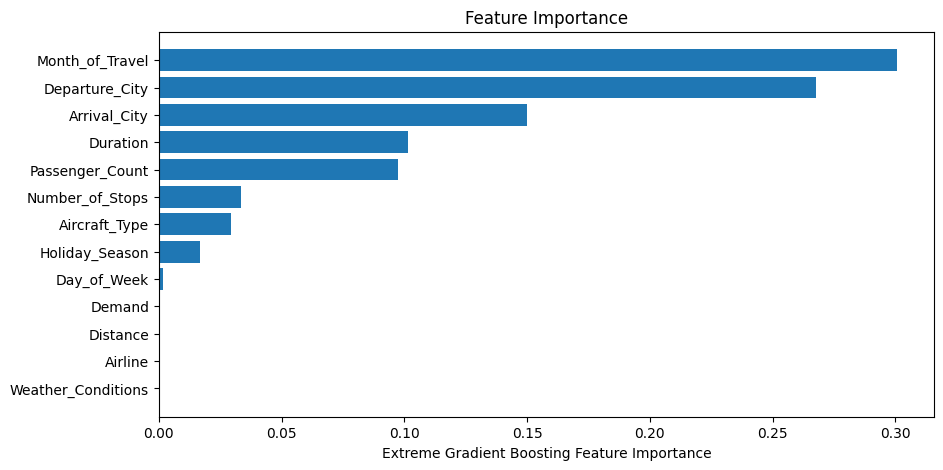

In [73]:
sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("Extreme Gradient Boosting Feature Importance")
plt.title("Feature Importance")
plt.show()